## Importing libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Loading Data

In [6]:
data = pd.read_csv("multiple_linear_regression.csv")

In [7]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## data preprocessing

In [9]:
data.dropna()
data.shape

(200, 4)

## Splitting data

In [10]:
output_col = "Target"
x = data.iloc[:, data.columns != output_col]
x

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y = data.loc[:, output_col]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [14]:
data.shape

(200, 4)

In [15]:
x_train.shape

(140, 3)

In [16]:
x_test.shape

(60, 3)

In [17]:
y_train.shape

(140,)

In [18]:
y_test.shape

(60,)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [21]:
lr.intercept_

3.077774495528045

## prediction

In [22]:
prev_value = lr.predict(x_test)

## cost

In [23]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, prev_value)
cost

2.2412862530933477

## Data visulization

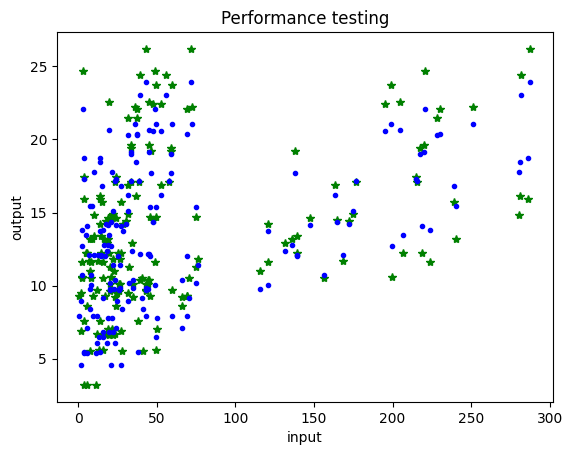

In [24]:
plt.plot(x_test, y_test, '*', color='green')
plt.plot(x_test, prev_value, '.', color='blue')
plt.title("Performance testing")
plt.xlabel("input")
plt.ylabel("output")
plt.show()

## Linear Regression Assumption

### Homoscedasticity

In [25]:
residuals = y_test - prev_value

In [26]:
residuals

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
Name: Target, dtype: float64

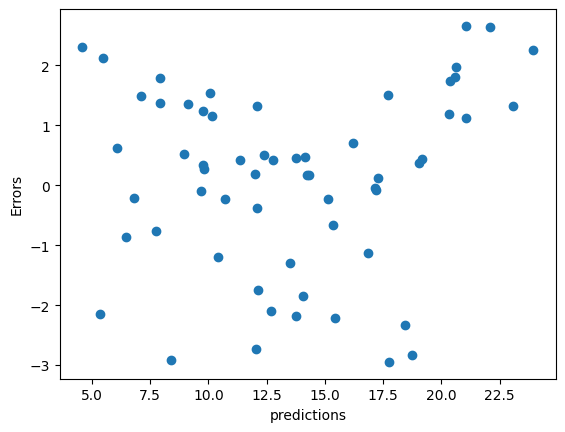

In [27]:
plt.scatter(prev_value, residuals)
plt.xlabel("predictions")
plt.ylabel("Errors")
plt.show()

## Normality in residuals

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20084\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

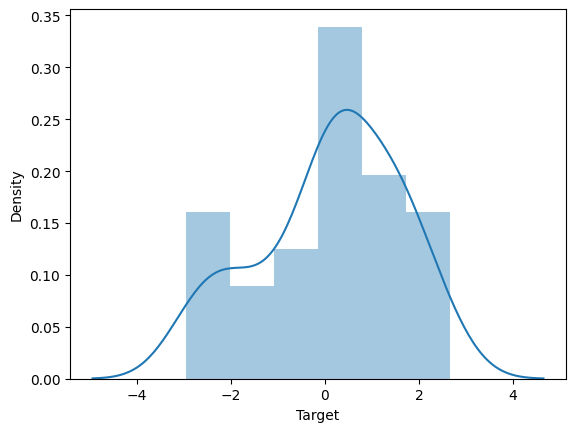

In [28]:
sns.distplot(residuals)

## <font color="green">Ordinary Least Square method</font>

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [34]:
import statsmodels.api as sm

In [31]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [38]:
model = sm.OLS(y_train, x_with_constant)
model

In [39]:
result = model.fit()

In [42]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [45]:
print(result.summary()) # feature is not good because it will accept null hypothesis

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.67e-63
Time:                        23:28:12   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [46]:
# testing
x_test = sm.add_constant(x_test)
x_test

,const,Feature 1,Feature 2,Feature 3
56,1.0,7.3,28.1,41.4
37,1.0,74.7,49.4,45.7
67,1.0,139.3,14.5,10.2
79,1.0,116.0,7.7,23.1
80,1.0,76.4,26.7,22.3
188,1.0,286.0,13.9,3.7
183,1.0,287.6,43.0,71.8
10,1.0,66.1,5.8,24.2
128,1.0,220.3,49.0,3.2
62,1.0,239.3,15.5,27.3


In [47]:
y_pred = result.predict(x_test)
y_pred

56      8.417101
37     15.361461
67     12.086193
79      9.759531
80     11.377992
188    18.735263
183    23.941584
10      7.119317
128    22.066062
62     16.831729
65      7.931159
17     23.072438
133    19.157298
195     5.476775
146    15.421023
38      9.822057
173    12.080236
149     9.760949
93     21.077177
29      9.139450
0      20.362058
2      12.038627
122    13.780821
180    10.732255
95     16.200615
121     7.770427
185    20.625121
39     20.319663
66      8.972660
19     14.137462
11     17.283814
45     15.138272
41     17.183768
92     19.033746
168    17.139522
1      12.146705
57     12.781595
189     6.081355
151    10.066350
167    13.489216
116    12.015498
138     9.701073
155     5.353987
82     10.149662
160    14.224196
181    14.047809
171    14.330535
12     10.394657
55     21.044180
77     13.747035
22      6.465117
129     7.905508
105    17.698666
102    17.746682
159    12.394989
9      12.693458
15     20.589467
150    18.426901
76      4.5914